In [24]:
import pandas as pd


DATA_ROOT_FOLDER =  "../data"

In [30]:
# Read from the csv file
df_db = pd.read_csv(f"{DATA_ROOT_FOLDER}/processed/ds_X_train_interpolated.csv",engine="pyarrow", delimiter="\t")
df_db.head()

,WebPriceId,DateObserve,StockStatus,CurrentPrice
0,1482201,2021-01-13 19:49:08.727,InStock,6400.0
1,1482201,2021-01-20 23:04:28.000,InStock,6208.0
2,1482201,2021-01-22 08:45:07.320,InStock,6400.0
3,1482201,2021-02-01 19:40:20.000,InStock,6000.0
4,1482201,2021-02-02 19:28:13.000,InStock,5820.0


In [31]:
df_db.head()

,WebPriceId,DateObserve,StockStatus,CurrentPrice
0,1482201,2021-01-13 19:49:08.727,InStock,6400.0
1,1482201,2021-01-20 23:04:28.000,InStock,6208.0
2,1482201,2021-01-22 08:45:07.320,InStock,6400.0
3,1482201,2021-02-01 19:40:20.000,InStock,6000.0
4,1482201,2021-02-02 19:28:13.000,InStock,5820.0


In [38]:
df_db.nunique()

WebPriceId       2424
DateObserve     80317
StockStatus         2
CurrentPrice    11171
dtype: int64

In [39]:
df_db.groupby("StockStatus").count()

,WebPriceId,DateObserve,CurrentPrice
StockStatus,,,
InStock,366091,366091,366091
OutOfStock,4564,4564,0


In [41]:
df_db.groupby("WebPriceId").count().shape[0]


2424

In [48]:
# Get data from the time period till x
def get_data_from_period(df, x):
    return df.loc[df["DateObserve"] <= x]

get_data_from_period(df_db, "2022-01-01").head(140)

,WebPriceId,DateObserve,StockStatus,CurrentPrice
0,1482201,2021-01-13 19:49:08.727,InStock,6400.0
1,1482201,2021-01-20 23:04:28.000,InStock,6208.0
2,1482201,2021-01-22 08:45:07.320,InStock,6400.0
3,1482201,2021-02-01 19:40:20.000,InStock,6000.0
4,1482201,2021-02-02 19:28:13.000,InStock,5820.0
...,...,...,...,...
143,1968908,2021-04-06 13:34:47.000,InStock,9736.0
144,1968908,2021-04-08 13:34:48.000,InStock,9690.0
145,1968908,2021-04-09 13:34:47.000,InStock,9736.0
146,1968908,2021-04-13 13:34:47.000,InStock,9645.0


122


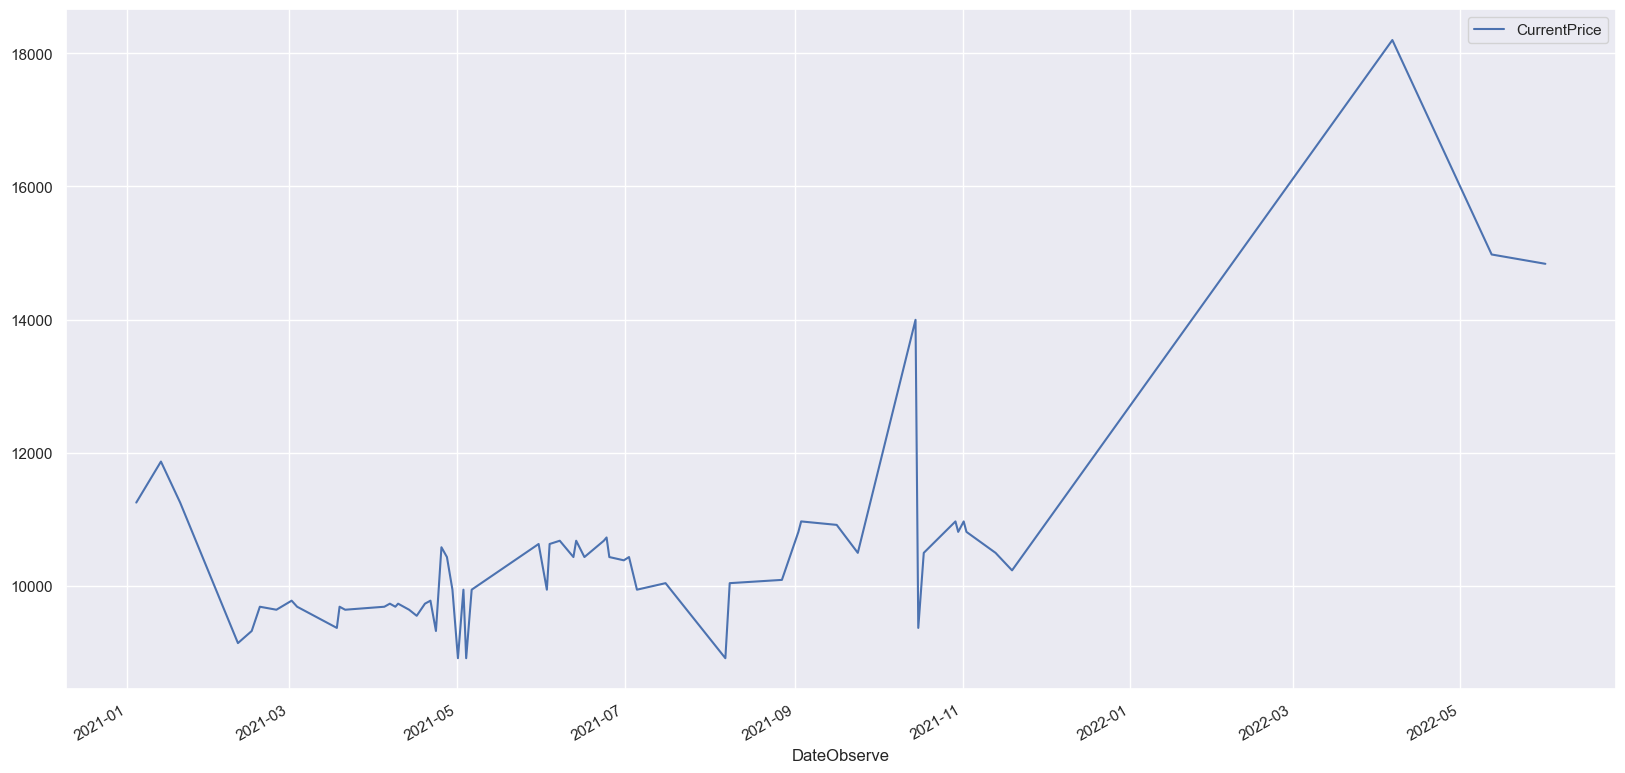

In [50]:
# plot df_db["WebPriceId" == 5804972]
id_item = 1968908	
print(len(df_db.loc[df_db["WebPriceId"] == id_item]))
sample = df_db.loc[df_db["WebPriceId"] == id_item][:]
sample.plot(x="DateObserve", y="CurrentPrice", figsize=(20,10))
plt.show()

In [59]:
print(df_db.loc[df_db["WebPriceId"] == id_item].sort_values(by="DateObserve")[-50:])

        WebPriceId         DateObserve StockStatus  CurrentPrice
185497     1968908 2021-06-24 09:51:57     InStock       10730.0
166        1968908 2021-06-24 09:51:57     InStock       10730.0
167        1968908 2021-06-25 09:51:53     InStock       10436.0
185498     1968908 2021-06-25 09:51:53     InStock       10436.0
185499     1968908 2021-06-30 16:27:29     InStock       10387.0
168        1968908 2021-06-30 16:27:29     InStock       10387.0
169        1968908 2021-07-02 13:48:34     InStock       10436.0
185500     1968908 2021-07-02 13:48:34     InStock       10436.0
185501     1968908 2021-07-05 11:14:49     InStock        9946.0
170        1968908 2021-07-05 11:14:49     InStock        9946.0
185502     1968908 2021-07-15 20:46:57     InStock       10044.0
171        1968908 2021-07-15 20:46:57     InStock       10044.0
185503     1968908 2021-08-06 15:06:35     InStock        8917.0
172        1968908 2021-08-06 15:06:35     InStock        8917.0
173        1968908 2021-0

In [60]:
df_db.shape

(370655, 4)

In [61]:
df_db.dropna(inplace=True)

In [62]:
df_db.shape


(366091, 4)

In [63]:
df_db.groupby("WebPriceId").count().shape[0]

2424

<AxesSubplot:xlabel='DateObserve'>

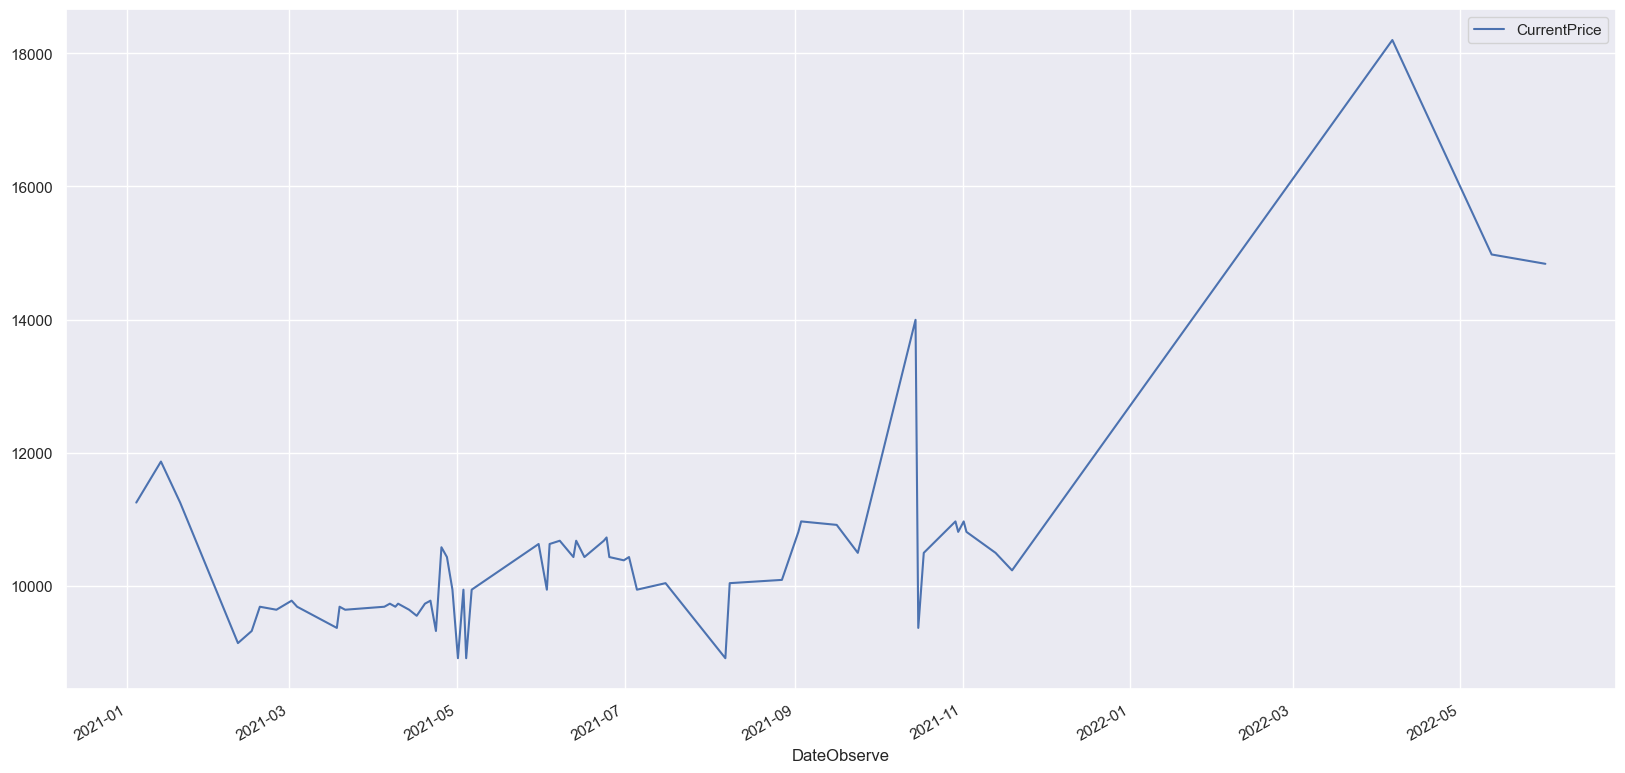

In [64]:
# Forecast next 30 days for df_db.loc[df_db["WebPriceId"] == id_item]
# https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

price_data = df_db.loc[df_db["WebPriceId"] == id_item]
price_data = price_data.sort_values(by="DateObserve")
# Plot 
price_data.plot(x="DateObserve", y="CurrentPrice", figsize=(20,10))